In [1]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid", palette="muted")


In [2]:
# reading the text file about the columns of the table
#created a markdown for desctiption of the columns
with open(r'C:\Users\Vikas\Desktop\bank-additional\column-details.txt') as file:
    content=file.readlines()
for line in content:
    print(line.strip())

age: (numeric)
job: type of job (categorical- "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
marital: marital status (categorical- "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
education: (categorical- "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
default: has credit in default? (categorical- "no","yes","unknown")
housing: has housing loan? (categorical- "no","yes","unknown")
loan: has personal loan? (categorical- "no","yes","unknown")
contact: contact communication type (categorical- "cellular","telephone")
month: last contact month of year (categorical- "jan", "feb", "mar", ..., "nov", "dec")
day_of_week: last contact day of the week (categorical- "mon","tue","wed","thu","fri")
duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the

|Feature|Description|
|------|-------------|
|age|(numeric)|
|job|type of job (categorical- "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")|
|marital|marital status (categorical- "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)|
|education|(categorical- "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")|
|default|has credit in default? (categorical- "no","yes","unknown")|
|housing|has housing loan? (categorical- "no","yes","unknown")|
|loan|has personal loan? (categorical- "no","yes","unknown")|
|contact|contact communication type (categorical- "cellular","telephone")|
|month|last contact month of year (categorical- "jan", "feb", "mar", ..., "nov", "dec")|
|day_of_week|last contact day of the week (categorical- "mon","tue","wed","thu","fri")|
|duration|last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.|
|campaign|number of contacts performed during this campaign and for this client (numeric, includes last contact)|
|pdays|number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)|
|previous|number of contacts performed before this campaign and for this client (numeric)|
|poutcome|outcome of the previous marketing campaign (categorical- "failure","nonexistent","success")|
|emp.var.rate|employment variation rate - quarterly indicator (numeric)|
|cons.price.idx|consumer price index - monthly indicator (numeric)|
|cons.conf.idx|consumer confidence index - monthly indicator (numeric)|
|euribor3m|euribor 3 month rate - daily indicator (numeric)|
|nr.employed|number of employees - quarterly indicator (numeric)|
|y|has the client subscribed a term deposit? (binary- "yes","no")|

In [3]:
#reading data

df_bank = pd.read_csv(r'C:\Users\Vikas\Desktop\bank-additional\bank-additional-full.csv', sep=";")

In [4]:
#looking into the dataset
df_bank.shape  # gives rows and columns
df_bank.info()   # data types and mising values
df_bank.describe()  # numeric summary
df_bank.head()  # peek at the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# As there are no null values
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
# counting unique value of each job
df_bank["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [7]:
# counting unique value of educattion
df_bank["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

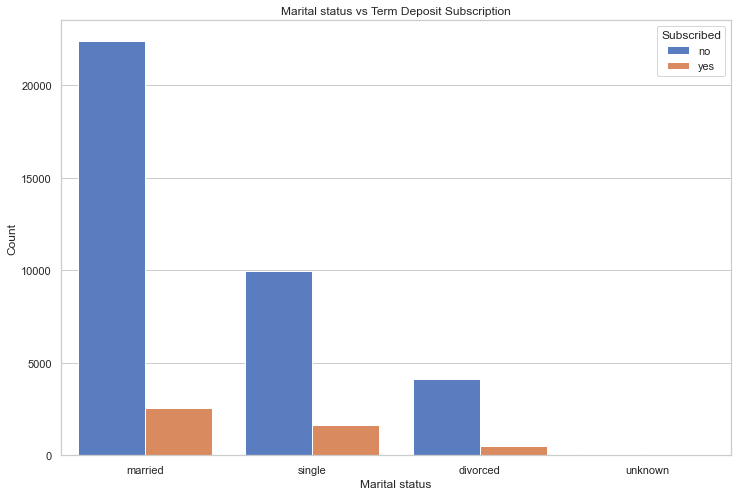

In [8]:
# plotting the countplot to see marital status have effect on subscription

plt.figure(figsize=(12,8))
sns.countplot(data=df_bank, x='marital', hue='y')

plt.title("Marital status vs Term Deposit Subscription")
plt.xlabel("Marital status")
plt.ylabel("Count")
plt.legend(title="Subscribed")
plt.show()

In [9]:
#The majority of the contacted clients were married, but most of them declined the term deposit.
#In contrast, single clients had a higher success rate relative to their total count. 

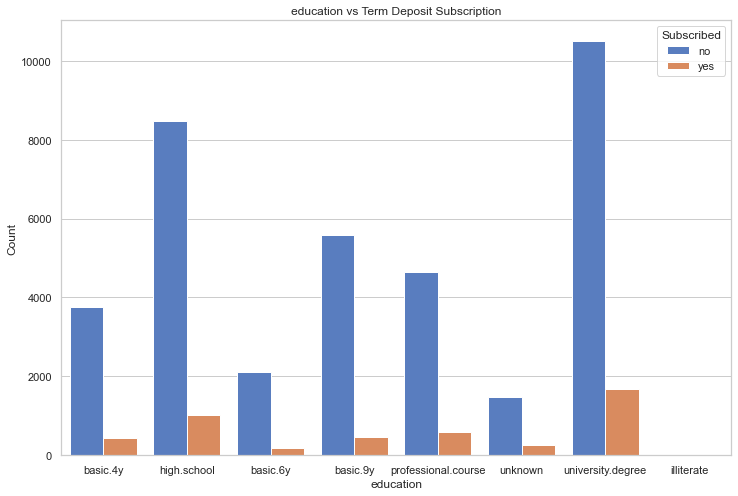

In [10]:
# plotting the countplot to see education degree have effect on subscription

plt.figure(figsize=(12,8))
sns.countplot(data=df_bank, x='education', hue='y')

plt.title("education vs Term Deposit Subscription")
plt.xlabel("education")
plt.ylabel("Count")
plt.legend(title="Subscribed")
plt.show()

In [11]:
# Clients with "high school and university degrees" had "the highest total number of subscriptions", but also the most rejections.
# This is expected, as they make up the largest portion of the dataset.
# To measure effectiveness, the **subscription rate (%) within each education level** must be considered.

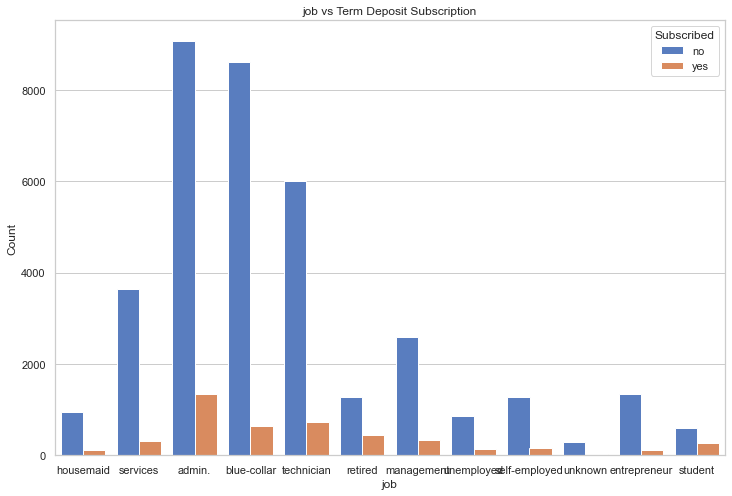

In [12]:
# plotting the countplot to see job have effect on subscription

plt.figure(figsize=(12,8))
sns.countplot(data=df_bank, x='job', hue='y')

plt.title("job vs Term Deposit Subscription")
plt.xlabel("job")
plt.ylabel("Count")
plt.legend(title="Subscribed")
plt.show()

In [13]:
# Most contacts were from admin., blue-collar, and technician roles, yet they had low subscription rates.
#Students, retirees, and self-employed clients, while fewer in number, showed relatively better success rates.


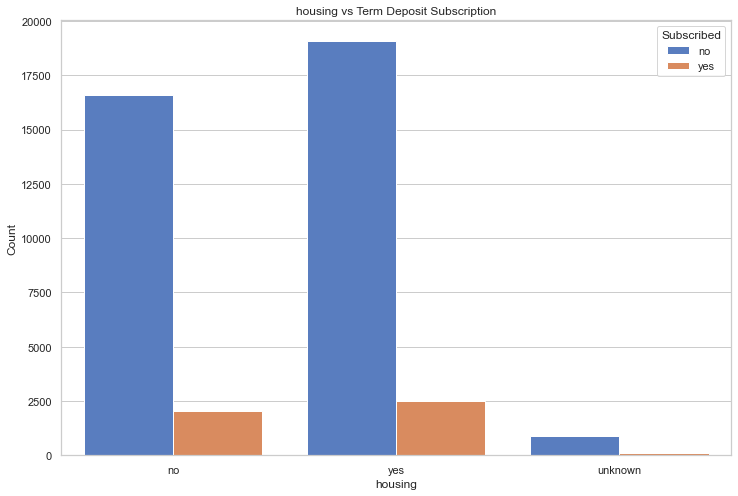

In [15]:
# plotting the countplot to see housing loan have effect on subscription

plt.figure(figsize=(12,8))
sns.countplot(data=df_bank, x='housing', hue='y')

plt.title("housing vs Term Deposit Subscription")
plt.xlabel("housing")
plt.ylabel("Count")
plt.legend(title="Subscribed")
plt.show()

In [20]:
# finding conversion rate for more accurate results
housing_conversion = df_bank.groupby('housing')['y'].value_counts(normalize=True).unstack()

housing_conversion

y,no,yes
housing,,
no,0.891204,0.108796
unknown,0.891919,0.108081
yes,0.883806,0.116194


In [21]:
# Clients with a housing loan have a higher conversion rate than those without.

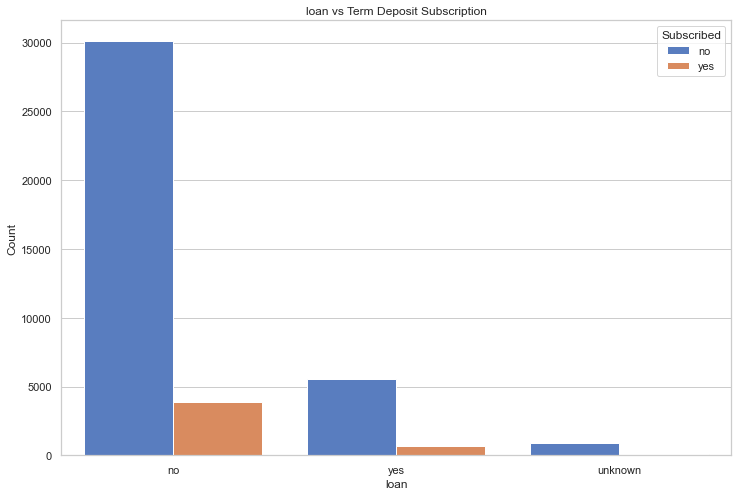

In [22]:
# plotting the countplot to see personal loan have effect on subscription

plt.figure(figsize=(12,8))
sns.countplot(data=df_bank, x='loan', hue='y')

plt.title("loan vs Term Deposit Subscription")
plt.xlabel("loan")
plt.ylabel("Count")
plt.legend(title="Subscribed")
plt.show()

In [23]:
# finding conversion rate for more accurate results
housing_conversion = df_bank.groupby('loan')['y'].value_counts(normalize=True).unstack()

housing_conversion

y,no,yes
loan,,
no,0.886598,0.113402
unknown,0.891919,0.108081
yes,0.890685,0.109315


In [24]:
# Clients without an existing personal loan have a higher conversion rate than those who have one.
# people with existing loan obligations may be more financially cautious and less inclined to invest in long-term products like term deposits.

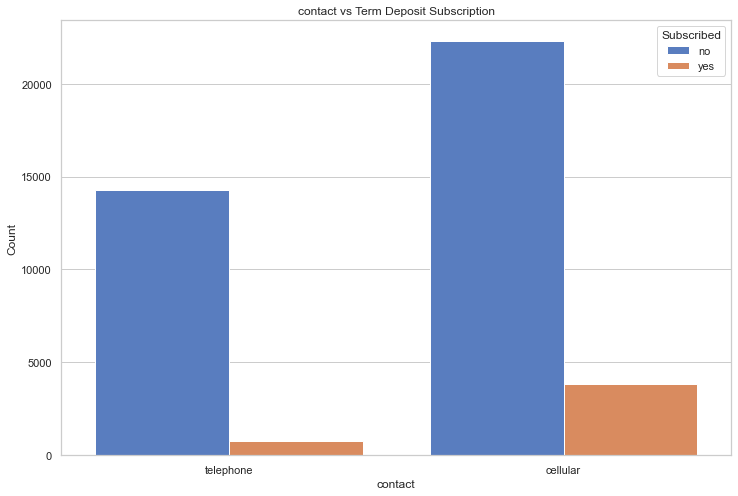

In [25]:
# plotting the countplot to see way of contact have effect on subscription

plt.figure(figsize=(12,8))
sns.countplot(data=df_bank, x='contact', hue='y')

plt.title("contact vs Term Deposit Subscription")
plt.xlabel("contact")
plt.ylabel("Count")
plt.legend(title="Subscribed")
plt.show()

In [26]:
# finding conversion rate for more accurate results
housing_conversion = df_bank.groupby('contact')['y'].value_counts(normalize=True).unstack()

housing_conversion

y,no,yes
contact,,
cellular,0.852624,0.147376
telephone,0.947687,0.052313


In [27]:
# The majority of contacts were made through cellular, and it also showed a higher conversion rate compared to telephone.
# Future campaigns should focus on cellular contact.


In [34]:
month_order = ['mar', 'apr', 'may', 'jun', 
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

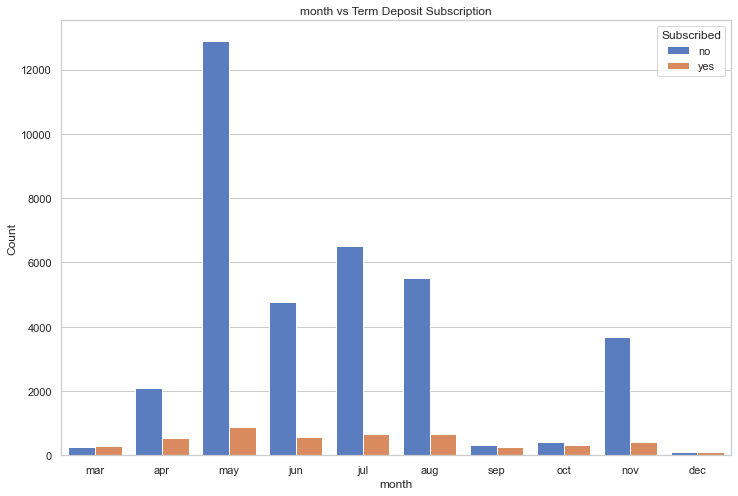

In [36]:
# plotting the countplot to see month of contact have effect on subscription

plt.figure(figsize=(12,8))
sns.countplot(data=df_bank, x='month', hue='y', order=month_order)

plt.title("month vs Term Deposit Subscription")
plt.xlabel("month")
plt.ylabel("Count")
plt.legend(title="Subscribed")
plt.show()

In [35]:
# finding conversion rate for more accurate results
housing_conversion = df_bank.groupby('month')['y'].value_counts(normalize=True).unstack()

housing_conversion.reindex(month_order)

y,no,yes
month,,
mar,0.494505,0.505495
apr,0.795213,0.204787
may,0.935653,0.064347
jun,0.894885,0.105115
jul,0.909534,0.090466
aug,0.893979,0.106021
sep,0.550877,0.449123
oct,0.561281,0.438719
nov,0.898561,0.101439


In [37]:
# Clients are significantly more responsive during March, December, September, and October.
# Possibly due to seasonal financial planning, bonuses, or end-of-quarter marketing efforts.
# The bank should focus campaign efforts during high-performing months
# and re-evaluate strategies in low-performing months like May and July.

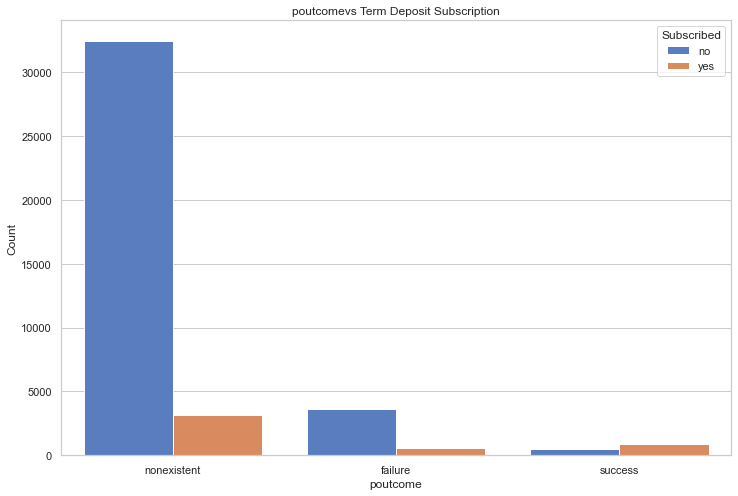

In [39]:
# plotting the countplot to see previous outcome have effect on subscription

plt.figure(figsize=(12,8))
sns.countplot(data=df_bank, x='poutcome', hue='y')

plt.title("poutcomevs Term Deposit Subscription")
plt.xlabel("poutcome")
plt.ylabel("Count")
plt.legend(title="Subscribed")
plt.show()

In [40]:
# finding conversion rate for more accurate results
housing_conversion = df_bank.groupby('poutcome')['y'].value_counts(normalize=True).unstack()

housing_conversion

y,no,yes
poutcome,,
failure,0.857714,0.142286
nonexistent,0.911678,0.088322
success,0.348871,0.651129


In [41]:
# A successful outcome in a previous campaign is a strong predictor of future success.
# The bank should prioritize re-targeting clients with past positive responses.
# The bank should tailor strategies differently for those with no or negative history.

In [46]:
#checking duplicates data and droping it
df_bank.duplicated().sum()
df_bank.drop_duplicates(inplace=True)

In [47]:
# counting unique value of each job
df_bank["job"].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [79]:
# unkown is about 0.8%, so, replacing it with admin (most frequent job).
df_bank['job'] = df_bank['job'].replace('unknown', 'admin.')

In [65]:
# function to to check percentage of defaul and most frequent value of each category
def col_unkown_check(df, column):
    total_rows = len(df)
    unknown_count = (df[column]=='unknown').sum()
    percentage = unknown_count/total_rows*100
    most_frequent = df[column].mode()[0]
    print(f"{column}, {unknown_count}, {percentage:.2f}%, {most_frequent}")

In [66]:
col_unkown_check(df_bank, 'marital')
col_unkown_check(df_bank, 'education')
col_unkown_check(df_bank, 'default')
col_unkown_check(df_bank, 'housing')
col_unkown_check(df_bank, 'loan')

marital, 80, 0.19%, married
education, 1730, 4.20%, university.degree
default, 8596, 20.88%, no
housing, 990, 2.40%, yes
loan, 990, 2.40%, no


In [67]:
# except default all are less than 5%, so replacing them with most frequent and keeping unkown in default

In [84]:
df_bank['marital'] = df_bank['marital'].replace('unknown', 'married')
df_bank['education'] = df_bank['education'].replace('unknown', 'university.degree')
df_bank['housing'] = df_bank['housing'].replace('unknown', 'yes')
df_bank['loan'] = df_bank['loan'].replace('unknown', 'no')

In [91]:
# grouping in education
def simplify_education(edu):
    if edu in ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y']:
        return 'basic'
    elif edu == 'high.school':
        return 'high.school'
    elif edu == 'university.degree':
        return 'university.degree'
    elif edu == 'professional.course':
        return 'professional.course'
    else:
        return edu 
    
df_bank['education_grouped'] = df_bank['education'].apply(simplify_education)

In [94]:
# converting target variable "yes" to "1" and "no" to "0".
df_bank['y']=df_bank['y'].map({'yes':1, 'no':0})

In [96]:
# creating a column as if contact before using pdays(if pdays=999, it means not contacted before)
df_bank['contacted_before']=df_bank['pdays'].apply(lambda x: "no" if x==999 else "yes")

In [97]:
# age grouping
bins = [0,20,30,40,50,60,100]
labels = ['<20','20-30','30-40','40-50','50-60','60+']
df_bank['age_group']=pd.cut(df_bank['age'], bins=bins, labels=labels)

In [99]:
df_bank['previous'].value_counts()

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [101]:
#grouping number of times contacted
def grouping(x):
    if x==0:
        return 'none'
    elif x<=2:
        return "1-2"
    else:
        return "3+"
        

df_bank["previous_contact_group"]=df_bank['previous'].apply(grouping)

In [108]:
# Now doing chi-square test between contacted before and taget variable y (as both are categorical)
from scipy.stats import chi2_contingency  # importing chi2


# creating contingency table
contingency_table = pd.crosstab(df_bank['contacted_before'],df_bank['y'])

#applying chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test between 'contacted_before' and 'y'")
print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)


Chi-Square Test between 'contacted_before' and 'y'
Chi-square Statistic: 4341.344316869189
Degrees of Freedom: 1
P-value: 0.0


In [109]:
# as P-value = 0.0 <0.05, there is strong association between contacted before and target variable y.
# Whether a person was contacted before does significantly influence whether they said "yes" to the campaign.

In [111]:
# conversion rate
df_bank.groupby('contacted_before')['y'].mean()*100

contacted_before
no      9.258465
yes    63.828383
Name: y, dtype: float64

In [112]:
# It shows about 9% who were not contacted before were converted.
# Aroung 64% who were contacted before converted.

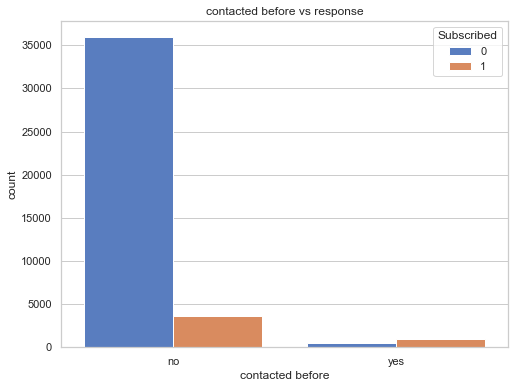

In [138]:
#countplot
plt.figure(figsize=(8,6))
sns.countplot(data=df_bank, x='contacted_before', hue='y')
plt.title("contacted before vs response")
plt.xlabel("contacted before")
plt.ylabel('count')
plt.legend(title="Subscribed")
plt.show()

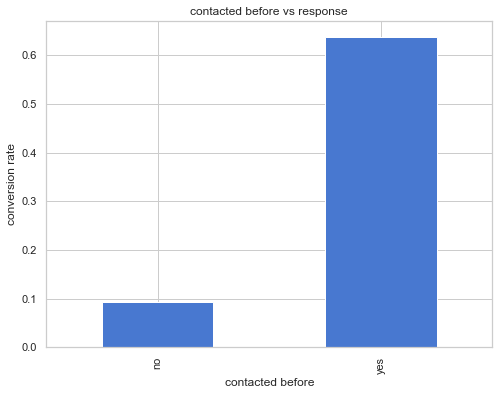

In [137]:
#converson rate plot

plt.figure(figsize=(8,6))
df_bank.groupby('contacted_before')['y'].mean().plot(kind='bar')
plt.title("contacted before vs response")
plt.xlabel("contacted before")
plt.ylabel('conversion rate')
plt.show()

In [121]:
# Now doing chi-square test between age group and taget variable y

# creating contingency table
contingency_table = pd.crosstab(df_bank['age_group'],df_bank['y'])

# applying chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test between 'age_group' and 'y'")
print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

Chi-Square Test between 'age_group' and 'y'
Chi-square Statistic: 1415.4375275641944
Degrees of Freedom: 5
P-value: 6.219008796458362e-304


In [115]:
# There is a strong and statistically significant association between age_group and whether a person said yes to the campaign.

In [122]:
# conversion rate
df_bank.groupby('age_group')['y'].mean()*100

age_group
<20      40.714286
20-30    14.735534
30-40     9.749695
40-50     8.166455
50-60    10.655607
60+      45.544554
Name: y, dtype: float64

In [117]:
# People under 20 and over 60 have a high conversion rate.
# People in age group 30-50 have very low conversion rate.

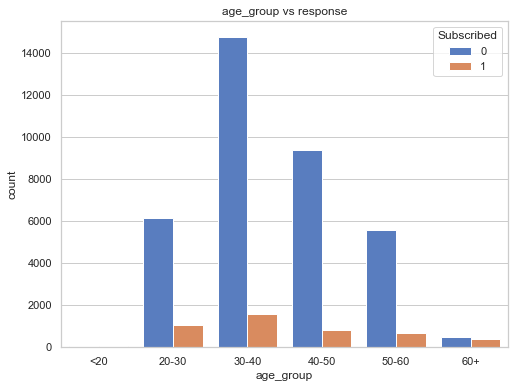

In [142]:
#countplot
plt.figure(figsize=(8,6))
sns.countplot(data=df_bank, x='age_group', hue='y')
plt.title("age_group vs response")
plt.xlabel("age_group")
plt.ylabel('count')
plt.legend(title="Subscribed")
plt.show()

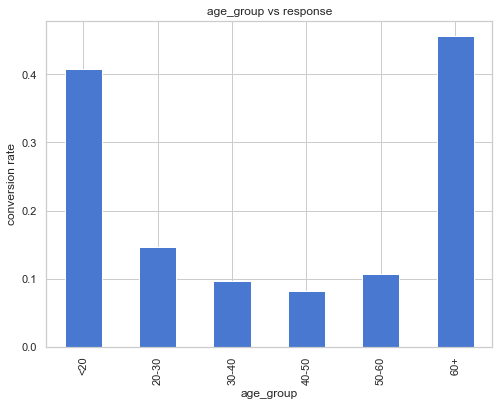

In [140]:
#converson rate plot

plt.figure(figsize=(8,6))
df_bank.groupby('age_group')['y'].mean().plot(kind='bar')
plt.title("age_group vs response")
plt.xlabel("age_group")
plt.ylabel('conversion rate')
plt.show()

In [123]:
# Now doing chi-square test between how many times contacted before and taget variable y

# creating contingency table
contingency_table = pd.crosstab(df_bank['previous_contact_group'],df_bank['y'])

# applying chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test between 'previous_contact_group' and 'y'")
print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

Chi-Square Test between 'previous_contact_group' and 'y'
Chi-square Statistic: 1879.4123711429993
Degrees of Freedom: 2
P-value: 0.0


In [124]:
# The number of previous contacts strongly affects whether a person says "yes".

In [125]:
# conversion rate
df_bank.groupby('previous_contact_group')['y'].mean()*100

previous_contact_group
1-2     24.778928
3+      58.709677
none     8.832382
Name: y, dtype: float64

In [126]:
# There's a clear, strong upward trend: more previous contact = much higher chance of saying yes.

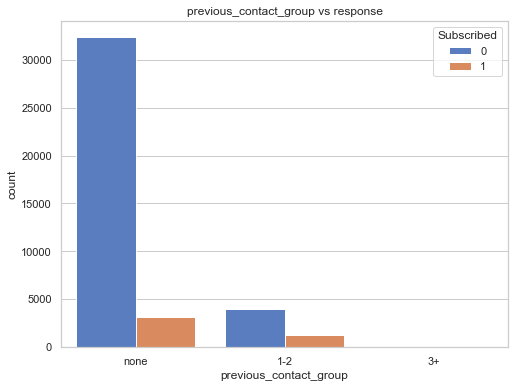

In [143]:
#countplot
plt.figure(figsize=(8,6))
sns.countplot(data=df_bank, x='previous_contact_group', hue='y')
plt.title("previous_contact_group vs response")
plt.xlabel("previous_contact_group")
plt.ylabel('count')
plt.legend(title="Subscribed")
plt.show()

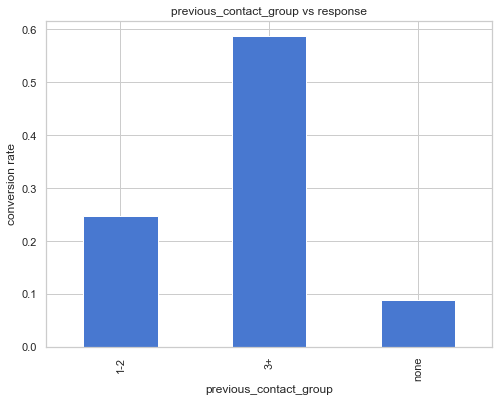

In [144]:
#converson rate plot

plt.figure(figsize=(8,6))
df_bank.groupby('previous_contact_group')['y'].mean().plot(kind='bar')
plt.title("previous_contact_group vs response")
plt.xlabel("previous_contact_group")
plt.ylabel('conversion rate')
plt.show()

**Objective**  
Analyze a bank's direct marketing campaign data to uncover factors that influence client subscription to a term deposit.

**Steps Taken

**Data Cleaning

-Removed duplicates and handled missing values (e.g., unknown job, education).
-Dropped or excluded duration due to data leakage.

**Exploratory Data Analysis (EDA)

-Created countplots and calculated conversion rates for key categorical variables (job, education, marital, housing, etc.).
-Identified trends:
       Highest number of “yes” responses came from clients with high school and university education.
       Blue-collar and admin jobs had low conversion rates.
       Contact via cellular was more successful than telephone.

**Statistical Analysis

-Performed chi-square tests between categorical features and the target (y).
-Found statistically significant relationships for variables like contact, previous, and poutcome.

**Insights

-Clients who were contacted previously and had a successful outcome (poutcome = success) showed much higher conversion rates.
-Conversion rates are higher for clients contacted via cellular, and those who were previously contacted more than 2 times.
-Features such as job, education, and marital status have influence, but less significant than prior contact data.